In [126]:
# imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import descartes

mpl.rcParams['figure.dpi'] = 500 # set dpi

In [36]:
gdf = gpd.read_file("Managed_Forest_Concessions_(WRI).geojson")

0      POLYGON ((114.13458 -0.53021, 114.13367 -0.530...
1      POLYGON ((113.60491 -0.70922, 113.60578 -0.713...
2      POLYGON ((115.00218 0.51575, 115.00275 0.52499...
3      POLYGON ((115.36715 -0.99657, 115.36042 -0.997...
4      POLYGON ((114.52149 0.09456, 114.51740 0.09456...
                             ...                        
552    POLYGON ((128.09399 -1.58862, 128.09199 -1.611...
553    POLYGON ((127.82153 -1.47120, 127.81420 -1.464...
554    POLYGON ((127.44390 -1.41444, 127.44369 -1.412...
555    POLYGON ((128.43168 1.01389, 128.44758 1.02929...
556    POLYGON ((128.62658 1.48769, 128.64858 1.50239...
Name: geometry, Length: 557, dtype: geometry

<AxesSubplot:>

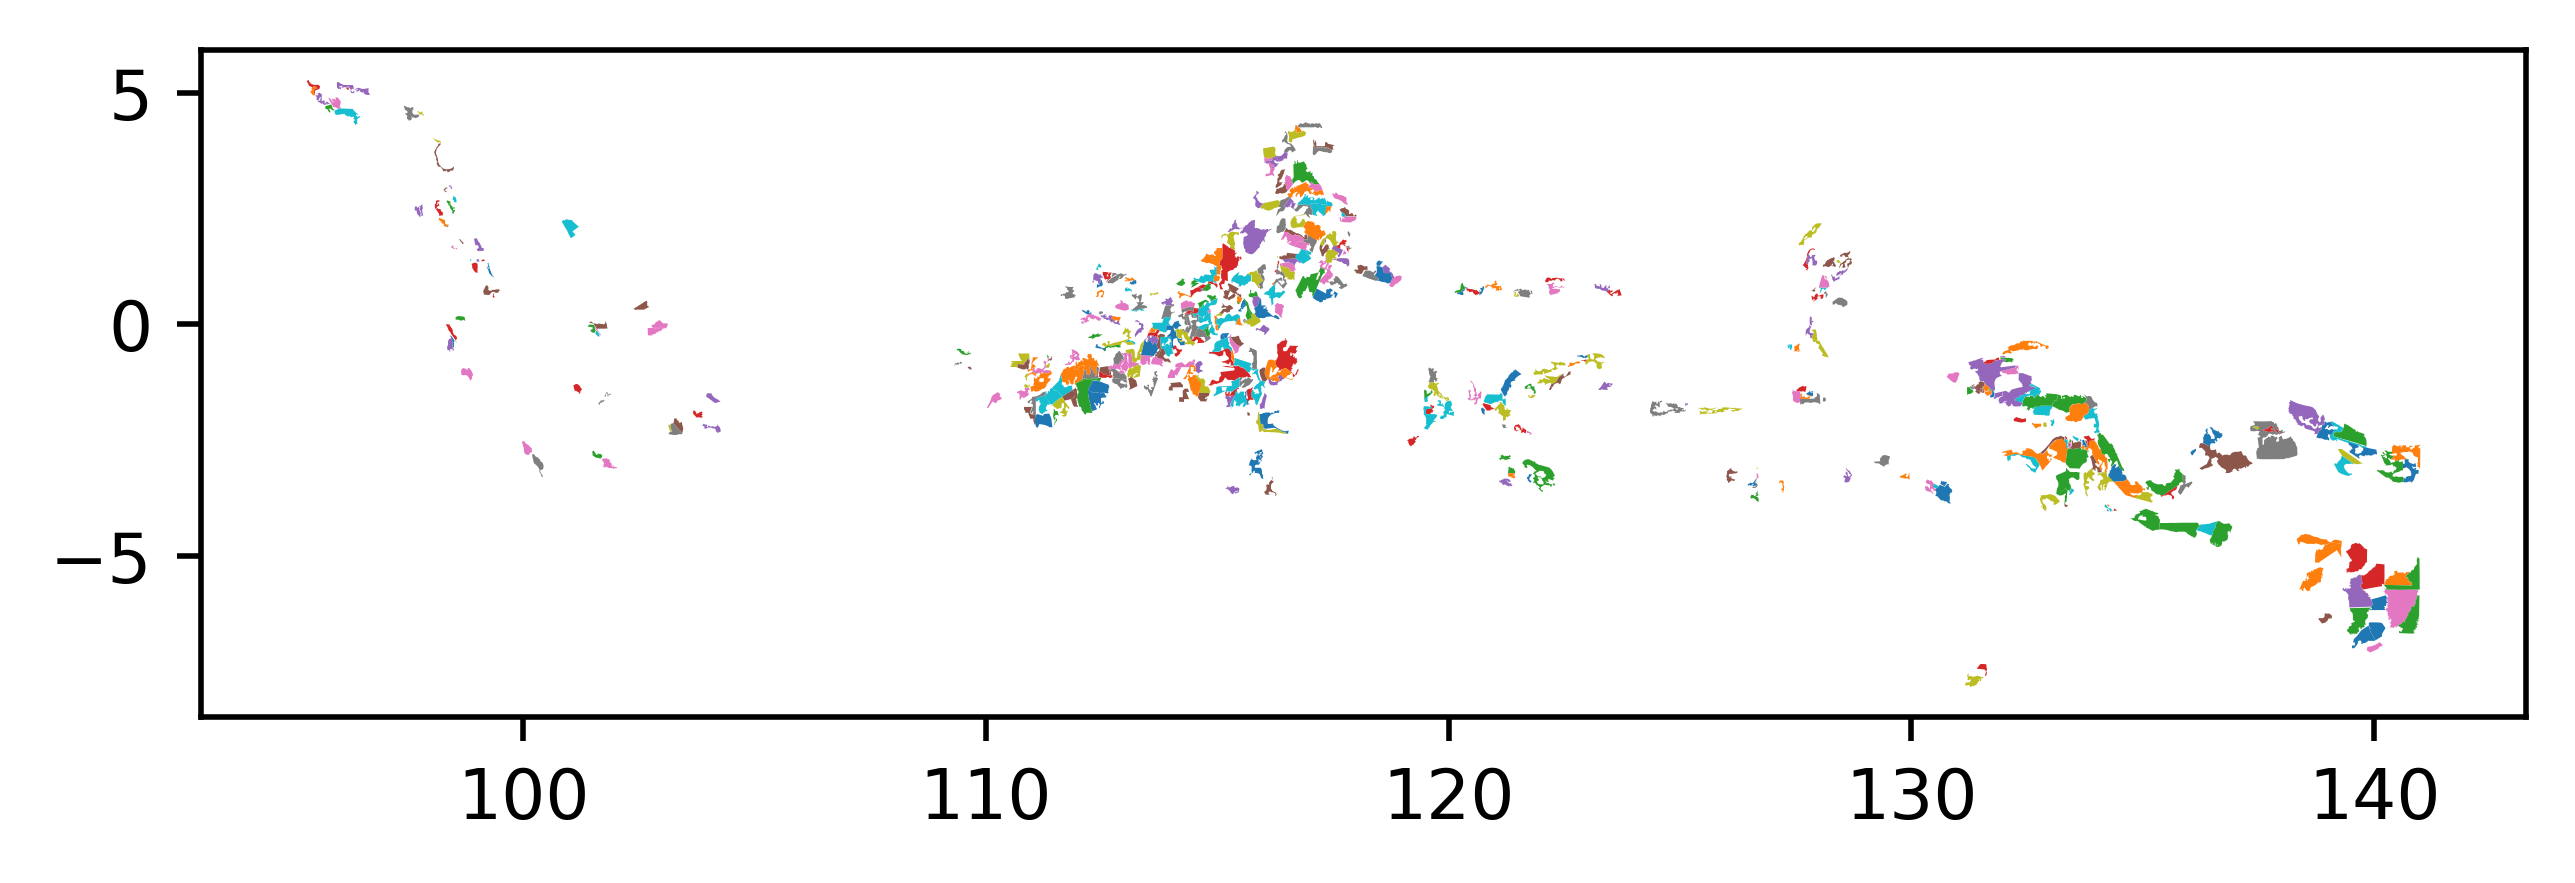

In [28]:
# plot map
gdf.plot("area_ha", legend=False) 

<AxesSubplot:>

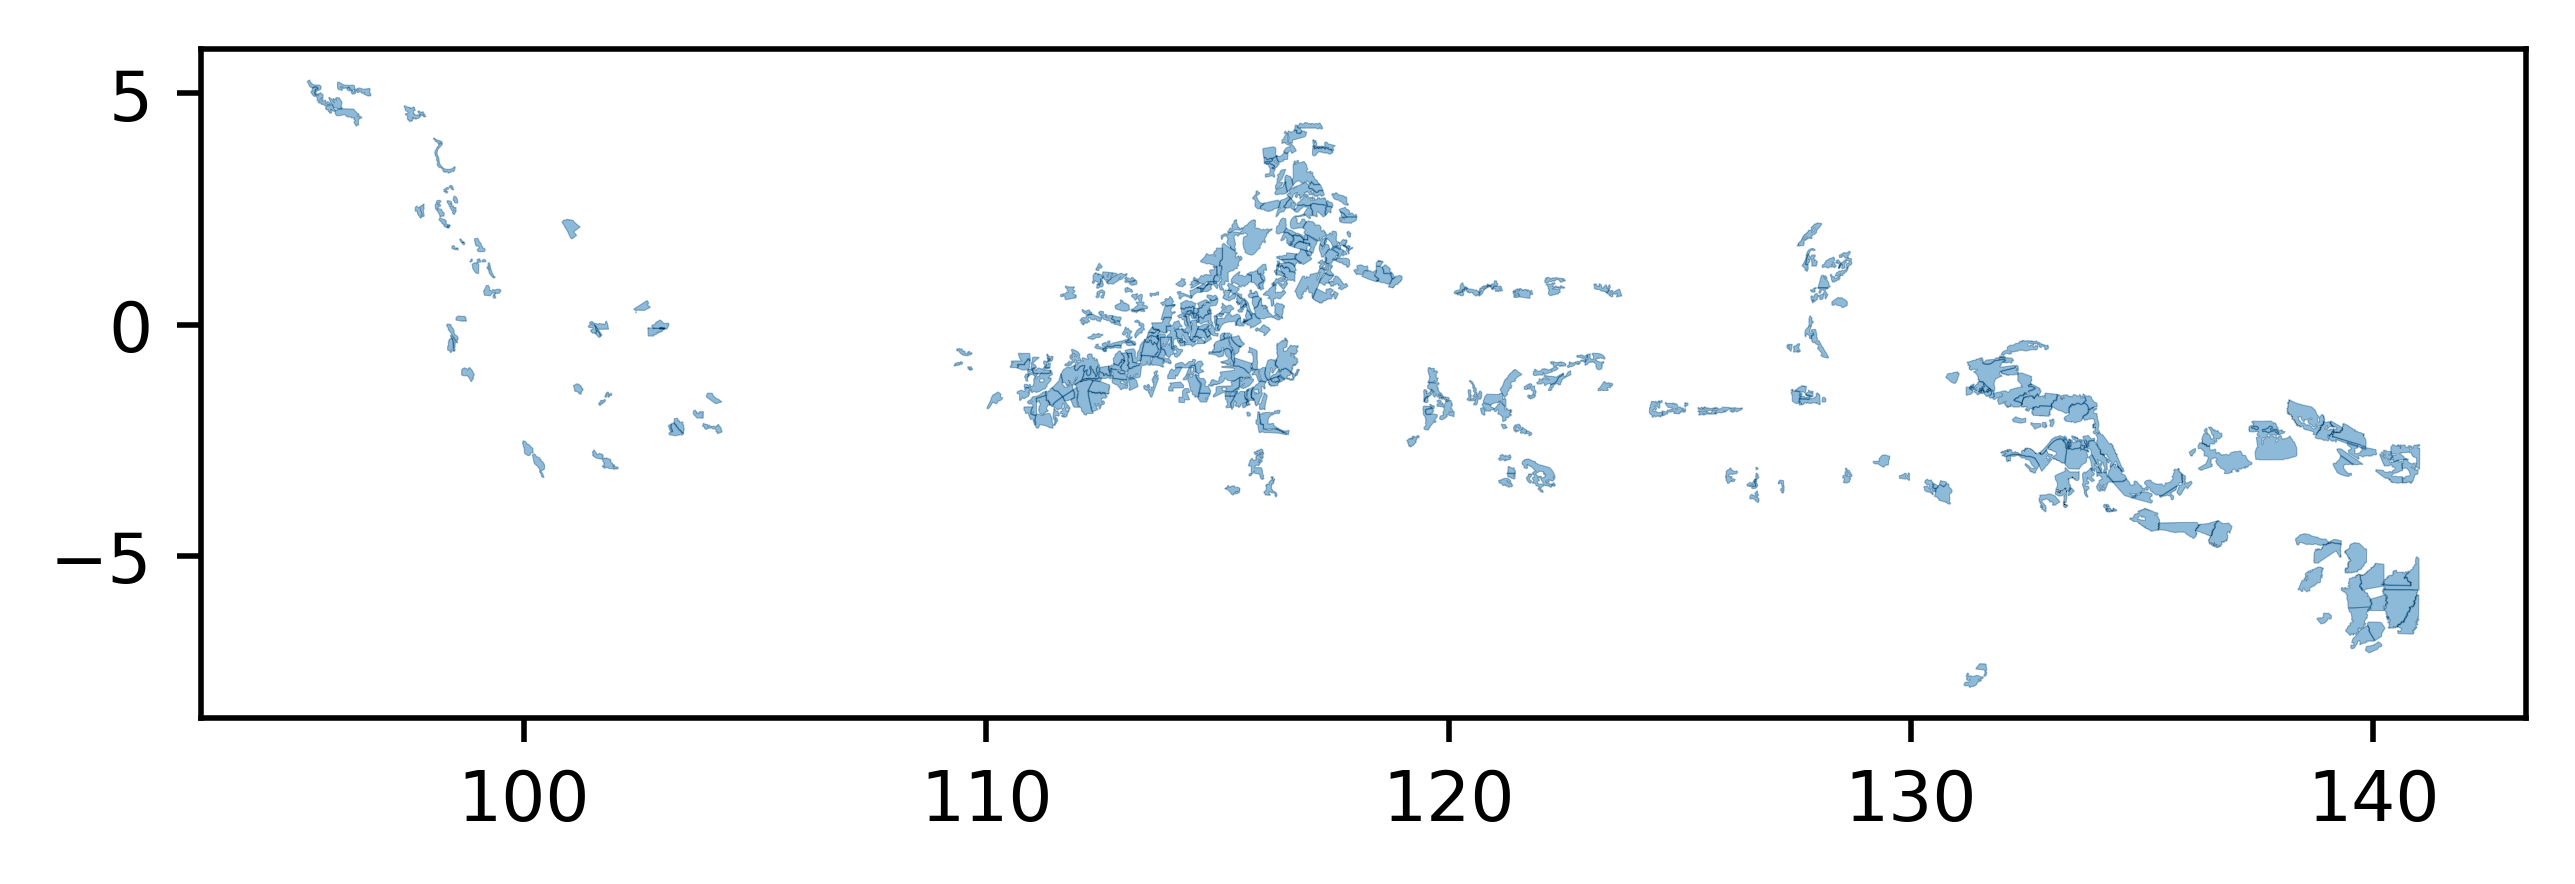

In [101]:
# One degree of latitude equals approximately 364,000 feet (69 miles), one minute equals 6,068 feet (1.15 miles), and one-second equals 101 feet. 
gdf["buffered"] = gdf.buffer(.02) # set buffer
ax = gdf.set_geometry('buffered').plot(alpha=.5) # saving the first plot as an axis and setting alpha (transparency) to 0.5
gdf.plot(ax=ax, facecolor = "none", edgecolor="black", linewidth=.02) # passing the first plot

In [134]:
# create adjacency matrix - 2d np array
adj_mat = []
for indx, polygon in enumerate(gdf.loc[:, "geometry"]):
    row = gdf.set_geometry("buffered").intersects(polygon).astype(int) # compute adjacencies (1 is adjacent, 0 elsewise)
    row[indx] = 0 # region should not be considered adjacent to itself
    adj_mat.append(np.array(row))

AttributeError: 'list' object has no attribute 'shape'

average: 2.4452423698384202
std dev: 2.7314183359888453
range: 0 26


{'whiskers': [<matplotlib.lines.Line2D at 0x24bf5820dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x24bf6de98b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24bf7ac7eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x24bf6de9c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x24bf6de9e20>],
 'means': []}

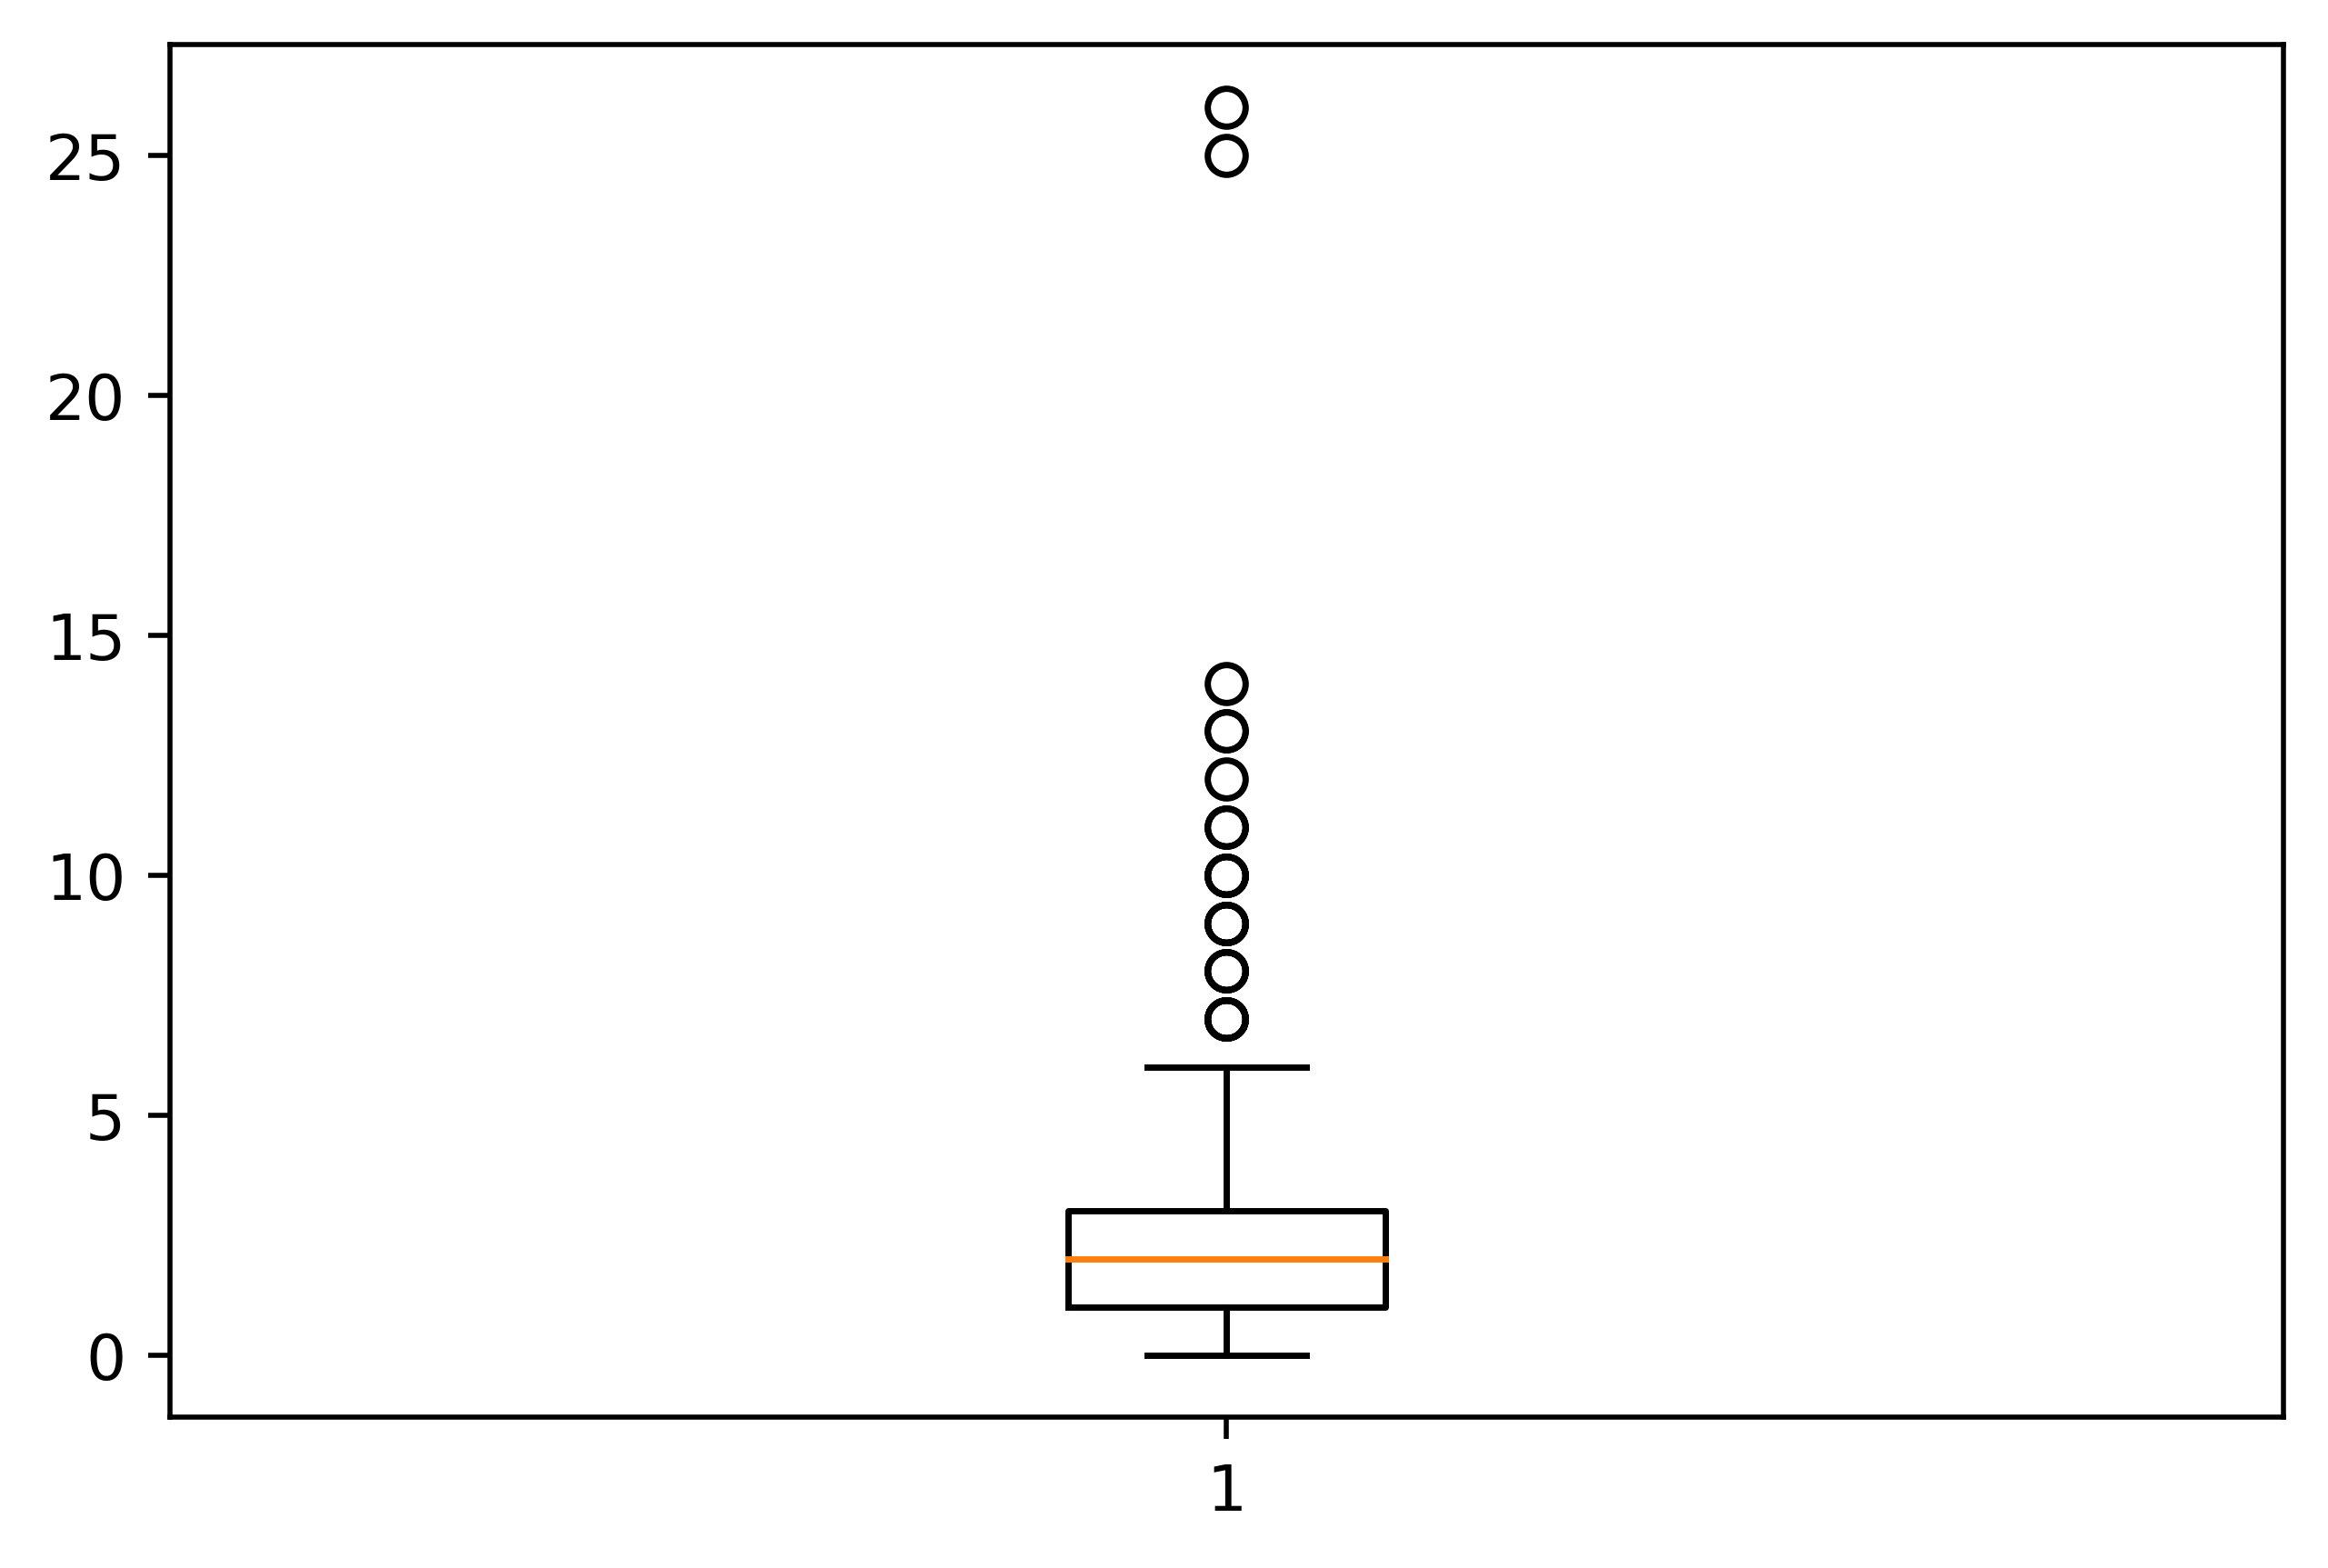

In [148]:
# see stats about adjacencies
num_neighbors = [np.count_nonzero(row == 1) for row in adj_mat] # list of num neighbors per polygon
print("average:", np.average(num_neighbors))
print("std dev:", np.std(num_neighbors))
print("range:", min(num_neighbors), max(num_neighbors))
# print(num_neighbors)
plt.boxplot(num_neighbors)


In [133]:
# save matrix as a csv file
adj_df = pd.DataFrame(adj_mat) 
adj_df.to_csv(r"logging_concession_adjacencies.csv")